### Moises Quiroz Diaz

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('submuestra_jpbr.csv')
df.head()

,Unnamed: 0,cname,undp_hdi,ccodealp,ht_region,gle_cgdpc,imf_pop,ffp_hf,wef_qes,wdi_expedu,wdi_ners
0,86,Kazakhstan,0.793,KAZ,EastEurope,14098.8800,17.422001,3.6,3.581975,2.78750,95.946281
1,16,Bhutan,0.604,BTN,SouthAsia,5639.0200,0.766000,6.8,4.033873,5.92460,62.838310
2,79,Iraq,0.649,IRQ,NorthAfrica,4178.2598,32.577999,8.1,NaN,NaN,NaN
3,138,Portugal,0.841,PRT,WesternDem,23744.6310,10.401000,2.2,4.273323,5.12559,93.035027
4,157,Vietnam,0.678,VNM,SouthEastAsia,4147.5698,89.691002,5.6,3.336011,5.65873,NaN


In [3]:
from ancilliary_funcs import*

### Estime el puntaje Z

Estime el puntaze Z para las 10 primeras y últimas observaciones de las variables con una menor
cantidad de datos perdidos

    Genere una nueva columna en la tabla de datos mediante funciones vectorizadas. Recuerde
    que para calcular el puntaje z de una observación se utiliza la fórmula: .
    Para ordenar los valores pueden utilzar la función sort_values del DataFrame analizado.
    Lean la documentación asociada al argumento by . Para evitar conflictos en la sobreescritura
    Asegúrense de eliminar las observaciones que tengan valores perdidos con dropna . Lean la
    documentación asociada al método subset .
    Seleccionen las primeras y últimas 10 observaciones de la base reordenada. ¿Qué
    características en común se encuentran?

In [4]:
def count_nan_df(base):
    columnas = base.columns
    fu = lambda x: count_nan(df= base,var =x)
    analisis = {columnas[i]:list(map(fu,columnas))[i] for i in range(len(columnas))}
    analisis = pd.DataFrame.from_dict(analisis)
    analisis.rename(index={0:'cantidad Nan',1:'porcentaje Nan'})
    return analisis
count_nan_df(df)

,Unnamed: 0,cname,undp_hdi,ccodealp,ht_region,gle_cgdpc,imf_pop,ffp_hf,wef_qes,wdi_expedu,wdi_ners
0,0.0,0.0,5.000000,0.0,0.0,1.000000,26.000000,11.000000,26.000000,32.000000,31.000000
1,0.0,0.0,0.051546,0.0,0.0,0.010309,0.268041,0.113402,0.268041,0.329897,0.319588


In [5]:
df_p_10 = df.head(10)
df_u_10 = df.tail(10)
df_p_10 = df_p_10[['gle_cgdpc']]
df_u_10 = df_u_10[['gle_cgdpc']]

In [6]:
df_p_mean = df_p_10.mean()
df_p_std = df_p_10.std()
df_u_mean = df_u_10.mean()
df_u_std = df_u_10.std()

In [7]:
df_p_10['z']=(df_p_10-df_p_mean)/df_p_std
z_o = df_p_10['z']
df_p_10

,gle_cgdpc,z
0,14098.88000,0.606532
1,5639.02000,-0.311789
2,4178.25980,-0.470355
3,23744.63100,1.653581
4,4147.56980,-0.473687
5,1354.29000,-0.776898
6,2624.05000,-0.639065
7,25295.27000,1.821904
8,3130.47000,-0.584093
9,900.77002,-0.826128


In [8]:
df_u_10['z']=(df_u_10-df_u_mean)/df_u_std
z_o_u = df_u_10['z']
df_u_10

,gle_cgdpc,z
87,852.39001,-0.693098
88,6049.14990,-0.529016
89,1651.05000,-0.667881
90,8507.65040,-0.451392
91,332.26999,-0.709520
92,26481.36900,0.116107
93,42258.35200,0.614247
94,5899.93990,-0.533727
95,102243.52000,2.508209
96,33764.71100,0.346070


In [9]:
df_p_10 = df[['gle_cgdpc']].sort_values(by='gle_cgdpc').head(10)
df_p_10['z']=(df_p_10-df_p_10.mean())/df_p_10.std()
z_o_f = df_p_10['z']
df_p_10

,gle_cgdpc,z
91,332.26999,-1.811025
11,488.26999,-1.280332
52,644.53998,-0.748720
87,852.39001,-0.041639
9,900.77002,0.122944
37,961.26001,0.328724
21,1024.93990,0.545355
28,1063.26000,0.675716
14,1095.96000,0.786957
35,1282.64000,1.422020


In [10]:
df_u_10 = df[['gle_cgdpc']].sort_values(by='gle_cgdpc').tail(10)
df_u_10 =df_u_10.dropna(subset=['gle_cgdpc'])
df_u_10['z']=(df_u_10-df_u_10.mean())/df_u_10.std()
z_o_u_f = df_u_10['z']
df_u_10

,gle_cgdpc,z
26,37406.762,-0.818781
55,38868.039,-0.765428
83,39486.699,-0.742840
93,42258.352,-0.641645
72,47769.699,-0.440420
42,57634.770,-0.080238
22,64342.711,0.164675
95,102243.520,1.548468
29,108481.130,1.776209


In [11]:
import matplotlib.pyplot as plt

(array([1., 1., 0., 1., 0., 2., 1., 2., 1., 1.]),
 array([-1.81102535, -1.48772079, -1.16441622, -0.84111166, -0.51780709,
        -0.19450253,  0.12880204,  0.4521066 ,  0.77541117,  1.09871573,
         1.4220203 ]),
 <a list of 10 Patch objects>)

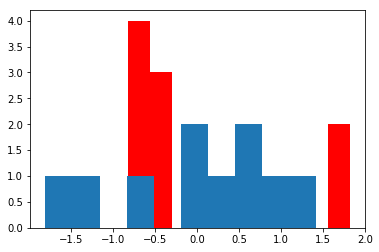

In [12]:
plt.hist(z_o,color='r')
plt.hist(z_o_f)

In [13]:
print(np.mean(z_o),np.mean(z_o_f))

8.881784197001253e-17 8.881784197001253e-17


(array([4., 1., 1., 1., 0., 0., 0., 0., 0., 2.]),
 array([-0.81878073, -0.55928176, -0.29978279, -0.04028382,  0.21921514,
         0.47871411,  0.73821308,  0.99771204,  1.25721101,  1.51670998,
         1.77620894]),
 <a list of 10 Patch objects>)

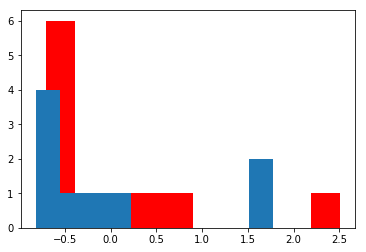

In [14]:
plt.hist(z_o_u,color='r')
plt.hist(z_o_u_f)

In [15]:
print(np.mean(z_o_u),np.mean(z_o_u_f))

-1.3877787807814457e-16 2.4671622769447922e-17


las primeras 2 comparaciones de z si bien los graficos son distintos sus medias son las mismas

Para las ultimas no se parece ni el grafico, pero el valor de las medias es cercano

### Estime el puntaje z de las regiones

In [81]:
def gen_dot(df,plot_var,plot_by,global_stat=False,statistic='mean'):
    if statistic == 'mean':
        if global_stat:
            var1 = df.groupby(plot_by)[plot_var].mean()
            var = plot_var
            plt.plot(var1.values, var1.index, 'o')
            plt.axvline(df[var].mean(), color='k', linestyle='dashed', linewidth=1)
            plt.text(df[var].mean() + df[var].mean()/10, 5, 'Mean: {:.2f}'.format(df[var].mean()))
            plt.show()
        else:
            var1 = df.groupby(plot_by)[plot_var].mean()
            plt.plot(var1.values, var1.index, 'o')
            plt.show()
    if statistic == 'median':
        if global_stat:
            var1 = df.groupby(plot_by)[plot_var].median()
            var = plot_var
            plt.plot(var1.values, var1.index, 'o')
            plt.axvline(df[var].median(), color='k', linestyle='dashed', linewidth=1)
            plt.text(df[var].median() + df[var].median()/10, 5, 'Mediana: {:.2f}'.format(df[var].median()))
            plt.show()
        else:
            var1 = df.groupby(plot_by)[plot_var].median()
            plt.plot(var1.values, var1.index, 'o')
            plt.show()
    if statistic == 'z':
        if global_stat:
            mean = df.groupby(plot_by)[plot_var].transform('mean')
            std = df.groupby(plot_by)[plot_var].transform('std')
            z_score = lambda x : zscore(x)
            var1 = (df.groupby(plot_by)[plot_var].transform(z_score)-a)/b
            df_t = df
            df_t['z'] = var1
            var2 = df_t.groupby(plot_by)['z'].median()
            plt.plot(var2.values, var2.index, 'o')
            plt.axvline(df_t['z'].median(), color='k', linestyle='dashed', linewidth=1)
            plt.text(df_t['z'].median() + df_t['z'].median()/10, 5, 'Media del z score: {:.2f}'.format(df_t['z'].median()))
            plt.show()
        else:
            mean = df.groupby(plot_by)[plot_var].transform('mean')
            std = df.groupby(plot_by)[plot_var].transform('std')
            z_score = lambda x : zscore(x)
            var1 = (df.groupby(plot_by)[plot_var].transform(z_score)-a)/b
            df_t = df
            df_t['z'] = var1
            var2 = df_t.groupby(plot_by)['z'].median()
            plt.plot(var2.values, var2.index, 'o')
            plt.show()

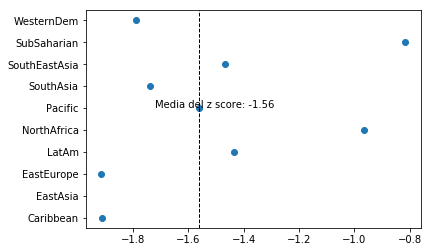

In [82]:
gen_dot(df,'gle_cgdpc','ht_region',True,'z')

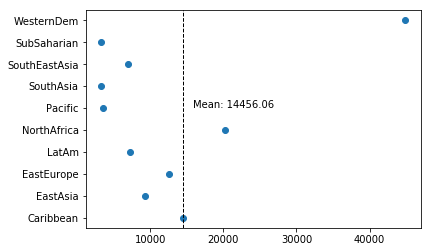

In [83]:
gen_dot(df,'gle_cgdpc','ht_region',True,'mean')

#### Genere un método que devuelva un gráfico comparando dos curvas de densidad

In [98]:
df2 = pd.read_csv('subsample_mrqd.csv')

In [128]:
import matplotlib.mlab as mlab
def gen_curvas(df1,df2,variable,log = False):
    if log:
        v1 = np.log(df1[variable])
        v2 = np.log(df2[variable])
        mu = v1.mean()
        sigma = v1.std()
        mu2 = v2.mean()
        sigma2 = v2.std()
        num_bins = 50
        fig, ax = plt.subplots()
        n, bins, patches = ax.hist(v1, num_bins, normed=1)
        n2, bins, patchess = ax.hist(v2, num_bins, normed=1)
        y = mlab.normpdf(bins, mu, sigma)
        y2 = mlab.normpdf(bins, mu2, sigma2)
        ax.plot(bins, y,'--',label='df1')
        ax.plot(bins, y2,'--',label='df2')
        ax.legend()
        fig.tight_layout()
        plt.show()
    else:
        v1 = df1[variable]
        v2 = df2[variable]
        mu = v1.mean()
        sigma = v1.std()
        mu2 = v2.mean()
        sigma2 = v2.std()
        num_bins = 50
        fig, ax = plt.subplots()
        n, bins, patches = ax.hist(v1, num_bins, normed=1)
        n2, bins, patchess = ax.hist(v2, num_bins, normed=1)
        y = mlab.normpdf(bins, mu, sigma)
        y2 = mlab.normpdf(bins, mu2, sigma2)
        ax.plot(bins, y,'--',label='df1')
        ax.plot(bins, y2,'--',label='df2')
        ax.legend()
        fig.tight_layout()
        plt.show()

Grafique las curvas para imf_pop , gle_cgdpc y undp_hdi . ¿En qué casos es necesario utilizar logaritmos? ¿Por qué?

/Users/moisesquiroz/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:14: MatplotlibDeprecationWarning: scipy.stats.norm.pdf
  
/Users/moisesquiroz/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:15: MatplotlibDeprecationWarning: scipy.stats.norm.pdf
  from ipykernel import kernelapp as app


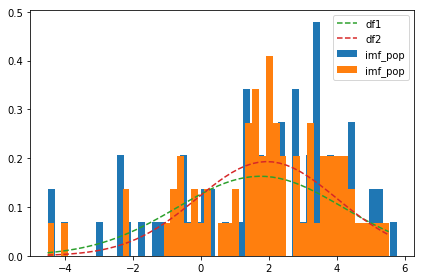

/Users/moisesquiroz/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:32: MatplotlibDeprecationWarning: scipy.stats.norm.pdf
/Users/moisesquiroz/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:33: MatplotlibDeprecationWarning: scipy.stats.norm.pdf


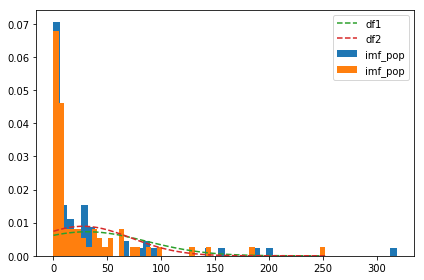

In [130]:
gen_curvas(df,df2,'imf_pop',True)
gen_curvas(df,df2,'imf_pop',False)

/Users/moisesquiroz/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:14: MatplotlibDeprecationWarning: scipy.stats.norm.pdf
  
/Users/moisesquiroz/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:15: MatplotlibDeprecationWarning: scipy.stats.norm.pdf
  from ipykernel import kernelapp as app


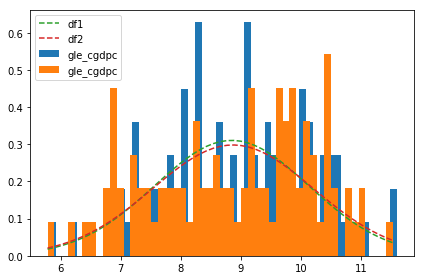

/Users/moisesquiroz/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:32: MatplotlibDeprecationWarning: scipy.stats.norm.pdf
/Users/moisesquiroz/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:33: MatplotlibDeprecationWarning: scipy.stats.norm.pdf


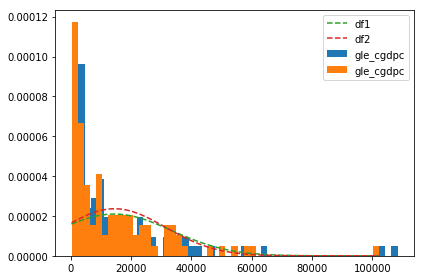

In [131]:
gen_curvas(df,df2,'gle_cgdpc',True)
gen_curvas(df,df2,'gle_cgdpc',False)

/Users/moisesquiroz/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:14: MatplotlibDeprecationWarning: scipy.stats.norm.pdf
  
/Users/moisesquiroz/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:15: MatplotlibDeprecationWarning: scipy.stats.norm.pdf
  from ipykernel import kernelapp as app


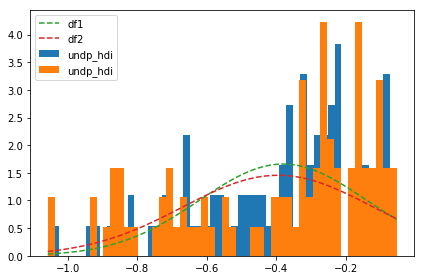

/Users/moisesquiroz/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:32: MatplotlibDeprecationWarning: scipy.stats.norm.pdf
/Users/moisesquiroz/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:33: MatplotlibDeprecationWarning: scipy.stats.norm.pdf


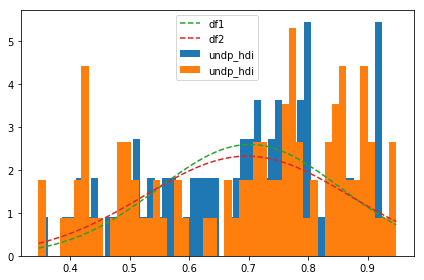

In [132]:
gen_curvas(df,df2,'undp_hdi',True)
gen_curvas(df,df2,'undp_hdi',False)

Se considera que es util utilizar logaritmos en los 3 casos, debido a que de esta forma los graficos muestran de mejor manera una distribucion log-normal ya que se asemejan a una campana de gauss